<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Magnet_Moment/blob/main/Lab2_Moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2. Performing experiments with magnetic moment

Description on [Moodle](https://moodle2223.technion.ac.il/course/view.php?id=4122&section=11#tabs-tree-start)

[PHYWE](https://www.phywe.com/experiments-sets/university-experiments/magnetic-moment-in-the-magnetic-field_10687/) experimentt documentation.

Evgeny Kolonsky, Feb 2023

## Setup
1. PHYWE Magnetic moment experiment kit:
  - Helmholz rings
  - aliminuim loops 12cm-3loops, 12-2, 12-1, 8-1, 6-1
2. Wires :
  - banana **32A** 1000mm blue/green, x5
  - banana **32A** 1000mm red/yellow, x3
3. Measurement equipment:
  - Teslameter PHYWE
  - DMM for measuring current, x2
  - line for measuring loops diameter
  - dynamometr PHYWE
4. Power supply TENMA 20V 5A
   Power supply TENMA 60V 3A

Note: The experiment with high currents. Be careful and use appropriate wires.

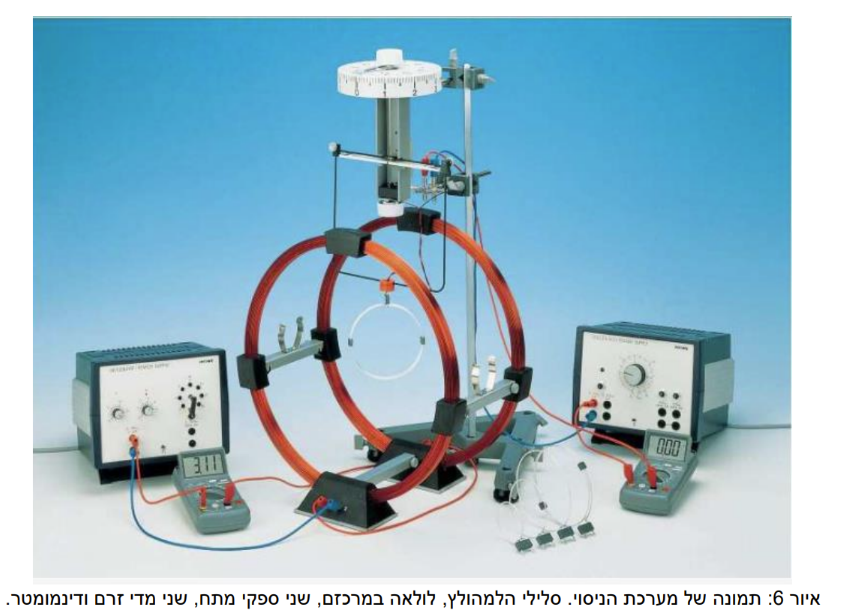

1.12988701129887
0.094247779659
0.02510760848748962
0.05022023849667675


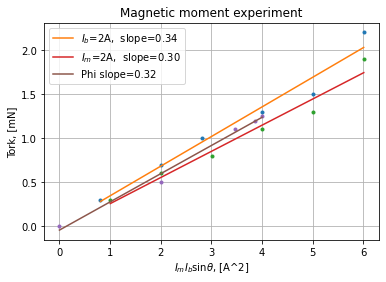

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 13 10:13:41 2023

@author: Evgeny
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import scipy.constants as const


#%% constants and parameters
#Helmholz rings

R = 0.15 #m
N = 124
mu0 = const.mu_0

#%% Experiment 1
# loop - check size by simple liner
d = .12 #m
n = 3
r = d/2

B = 2.26e-3 #Tesla
Ib = 2.0002

print(B/Ib*1e3)

# teslometer
Im = 3.0
B2 = .12e-3 #Tesla
print(mu0*Im*n/d*1e3)
##

#%% Experiment A:Ib=2, changed Im, theta4 = 90

theta4 = np.pi/2
Ib = 2.0002

measurements ='''
3.002 2.2
2.504 1.5
2.002 1.3
1.404 1.0
1.002 0.7
0.405 0.3
'''
data = np.genfromtxt(measurements.splitlines(), dtype=float)
Im, tork = data.T

ratio = Ib*Im*np.sin(theta4)

fit = linregress(ratio, tork)

plt.plot(ratio, tork,'.')
plt.plot(ratio, fit.slope*ratio + fit.intercept,
         label='$I_b$={:.0f}A,  slope={:.2f}'.format(Ib, fit.slope))


# Experiment B:Im=2, changed Ib, theta4 = 90

theta4 = np.pi/2 # grad
Im = 2.0002
measurements ='''
3.003 1.9
2.500 1.3
2.002 1.1
1.502 0.8
1.000 0.6
0.502 0.3
'''

data = np.genfromtxt(measurements.splitlines(), dtype=float)
Ib, tork = data.T

ratio = Ib*Im*np.sin(theta4)

fit = linregress(ratio, tork)

plt.plot(ratio, tork,'.')
plt.plot(ratio, fit.slope*ratio + fit.intercept,
         label='$I_m$={:.0f}A,  slope={:.2f}'.format(Im, fit.slope))



a_theor = 0.74e-3*n*np.pi*r*r*np.sin(theta4)
print(a_theor*1e3)

# Experiment C:Im=2, Ib=2, changed theta4

Im = 2.0002
Ib = 2.0002
measurements ='''
90 1.25
75 1.2
60 1.1
30 .5
0  .0
'''

data = np.genfromtxt(measurements.splitlines(), dtype=float)
theta, tork = data.T
theta = theta *np.pi/180

ratio = Ib*Im*np.sin(theta)

fit = linregress(ratio, tork)

plt.plot(ratio, tork,'.')
plt.plot(ratio, fit.slope*ratio + fit.intercept,
         label='Phi slope={:.2f}'.format(fit.slope))


plt.xlabel(r'$I_m I_b \sin\theta$, [A^2]')
plt.ylabel('Tork, [mN]')
plt.grid()
plt.legend()
plt.title('Magnetic moment experiment')

a_theor = 0.74e-3*Ib*n*np.pi*r*r*np.sin(theta4)
print(a_theor*1e3)